In [10]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

#Import dataset with Year as index and drop first column
df = pd.read_csv('~/PycharmProjects/PredictingPatientReadmission/datasets/County_RR_By_Income.csv',index_col='Year').iloc[:, 1:]
#Display dataframe
df.head()

,County,ICD Version,Total Admits (Consolidated),30-day Readmits (Consolidated),30-day Readmission Rate (Consolidated),PCPI
Year,,,,,,
2011,Alameda,ICD-9,75103.0,11377.0,15.1,50432.0
2011,Alpine,ICD-9,13.0,1.0,7.7,54040.0
2011,Amador,ICD-9,2657.0,345.0,13.0,34847.0
2011,Butte,ICD-9,20422.0,3198.0,15.7,33669.0
2011,Calaveras,ICD-9,3253.0,392.0,12.1,37516.0


This exploration is focused on examining the relationship between Per Capita Personal Income (PCPI) and 30-day Readmission Rate (Consolidated).

With this in mind it makes sense to begin with a correlation heatmap.

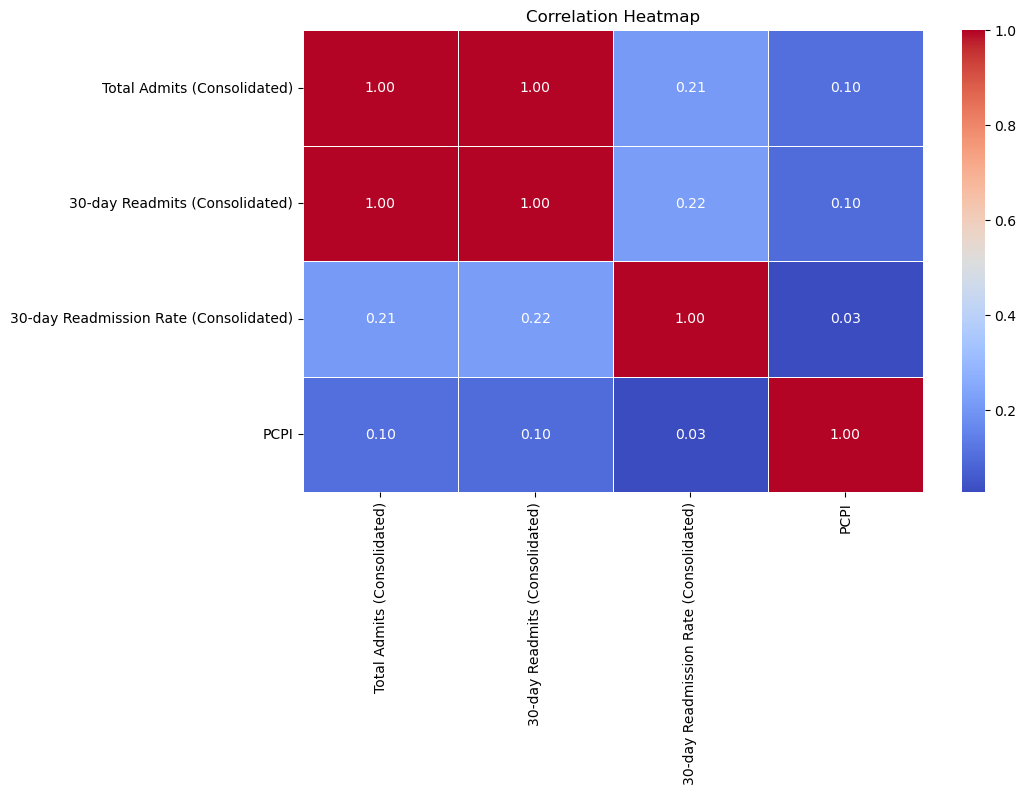

In [16]:


# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Based on the heatmap there doesn't appear to be correlation between PCPI and Readmission Rate, however there does appear to be weak correlation (around 0.2) between both Total Admits and 30-day Readmits with 30-day Readmission Rate.

Additionally there is a weak correlation (around 0.1) between both Total Admits and 30-day Readmits with Per Capita  Personal Income (PCPI).

With this in mind it is still possible for PCPI to relate to Readmission Rate through its correlation with the other two correlated variables (Total Admits and 30-day Readmits). 

In order to test this intuition path analysis or multiple regression may be implemented in the analysis section.

There are 58 counties in California, in order to build a deeper understanding of the relationship between PCPI and Readmission Rate and how this relationship varies across counties it will be helpful to visualize these relationships.

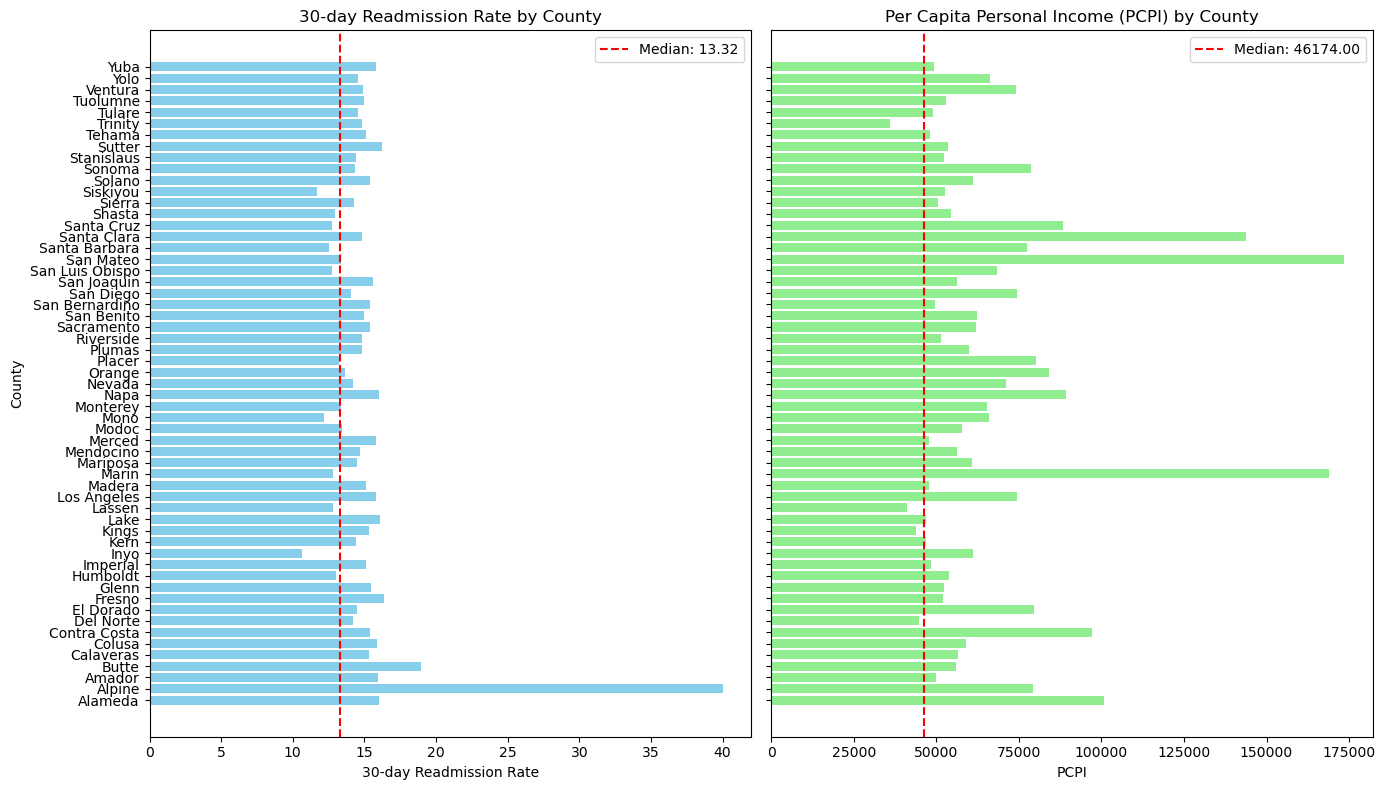

In [15]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

# Calculate medians
median_readmission_rate = df['30-day Readmission Rate (Consolidated)'].median()
median_pcpi = df['PCPI'].median()

# Bar plot for '30-day Readmission Rate (Consolidated)'
axes[0].barh(df['County'], df['30-day Readmission Rate (Consolidated)'], color='skyblue')
axes[0].axvline(median_readmission_rate, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_readmission_rate:.2f}')
axes[0].set_xlabel('30-day Readmission Rate')
axes[0].set_ylabel('County')
axes[0].set_title('30-day Readmission Rate by County')
axes[0].legend()

# Bar plot for 'PCPI'
axes[1].barh(df['County'], df['PCPI'], color='lightgreen')
axes[1].axvline(median_pcpi, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_pcpi:.2f}')
axes[1].set_xlabel('PCPI')
axes[1].set_title('Per Capita Personal Income (PCPI) by County')
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


There appears to be significantly more variation of PCPI by County compared to Readmisison Rate. As a follow-up it should be insightful to isolate the top and bottom 5 counties for each of the variables and analyze their similarities/differences.

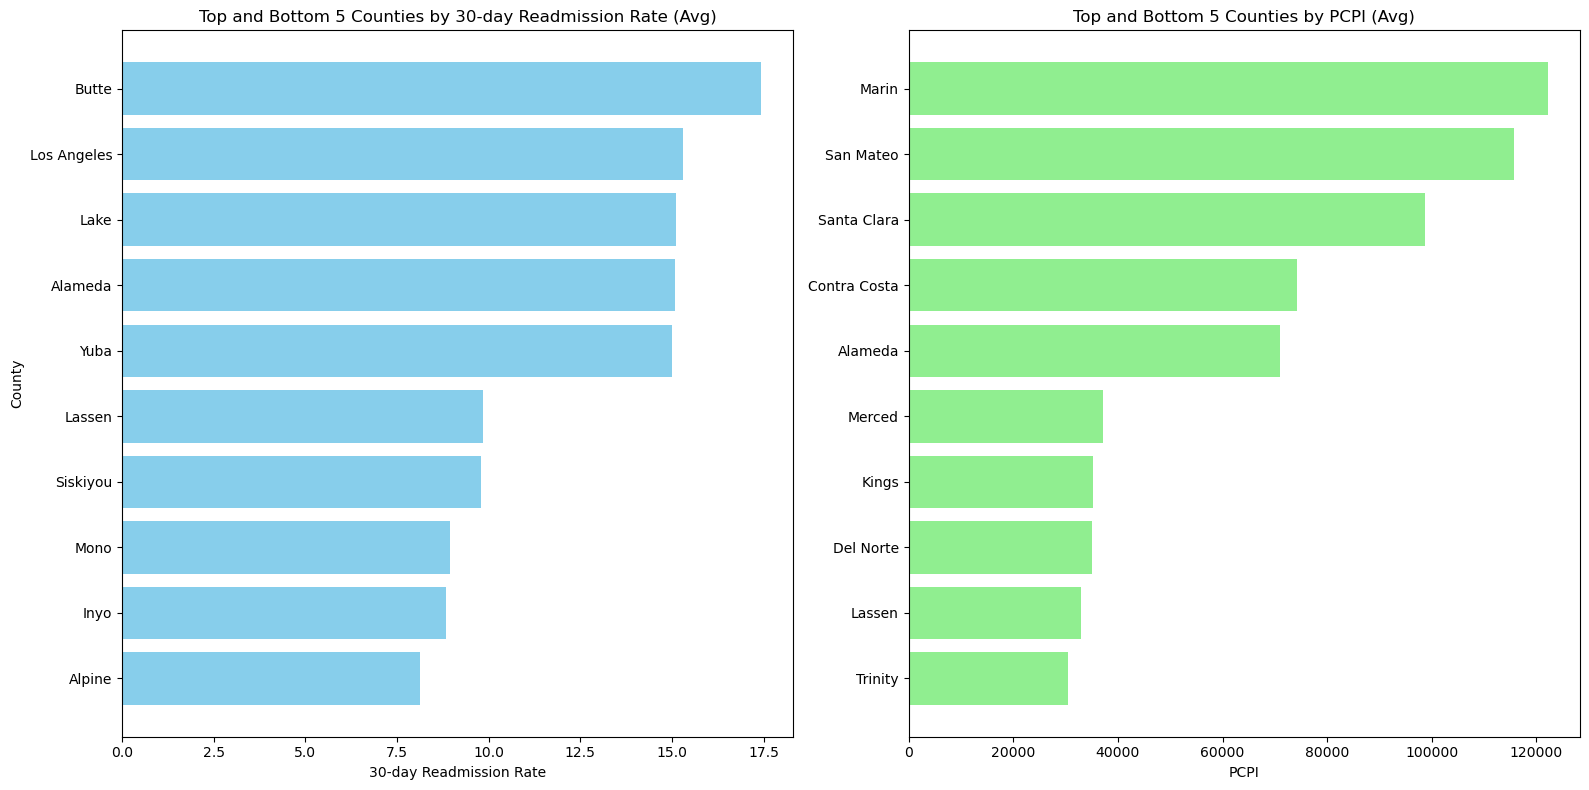

In [21]:
# Group by 'County' and calculate the average values
df_grouped = df.groupby('County').mean(numeric_only=True).reset_index()

# Isolate top 5 and bottom 5 counties by '30-day Readmission Rate (Consolidated)'
top_5_readmission = df_grouped.nlargest(5, '30-day Readmission Rate (Consolidated)').sort_values(by='30-day Readmission Rate (Consolidated)')
bottom_5_readmission = df_grouped.nsmallest(5, '30-day Readmission Rate (Consolidated)').sort_values(by='30-day Readmission Rate (Consolidated)')

# Isolate top 5 and bottom 5 counties by 'PCPI'
top_5_pcpi = df_grouped.nlargest(5, 'PCPI').sort_values(by='PCPI')
bottom_5_pcpi = df_grouped.nsmallest(5, 'PCPI').sort_values(by='PCPI')

# Combine data for visualization
readmission_combined = pd.concat([bottom_5_readmission, top_5_readmission])
pcpi_combined = pd.concat([bottom_5_pcpi, top_5_pcpi])

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot for '30-day Readmission Rate (Consolidated)'
axes[0].barh(readmission_combined['County'], readmission_combined['30-day Readmission Rate (Consolidated)'], color='skyblue')
axes[0].set_xlabel('30-day Readmission Rate')
axes[0].set_ylabel('County')
axes[0].set_title('Top and Bottom 5 Counties by 30-day Readmission Rate (Avg)')

# Bar plot for 'PCPI'
axes[1].barh(pcpi_combined['County'], pcpi_combined['PCPI'], color='lightgreen')
axes[1].set_xlabel('PCPI')
axes[1].set_title('Top and Bottom 5 Counties by PCPI (Avg)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


From the visualization we can see there's not much overlap. The only county which occurs in the same group for both variables is Alameda.

This observation validates the previous intuitions gained from the correlation analysis.

Since based on the correlation analysis it was hypothesized that Total Admits and 30-day Readmits may act as a mediating variable between 30-day Readmission Rate and PCPI it is logical to follow up on this intuition by visualizing the top and bottom 5 counties for each of these mediating variables.

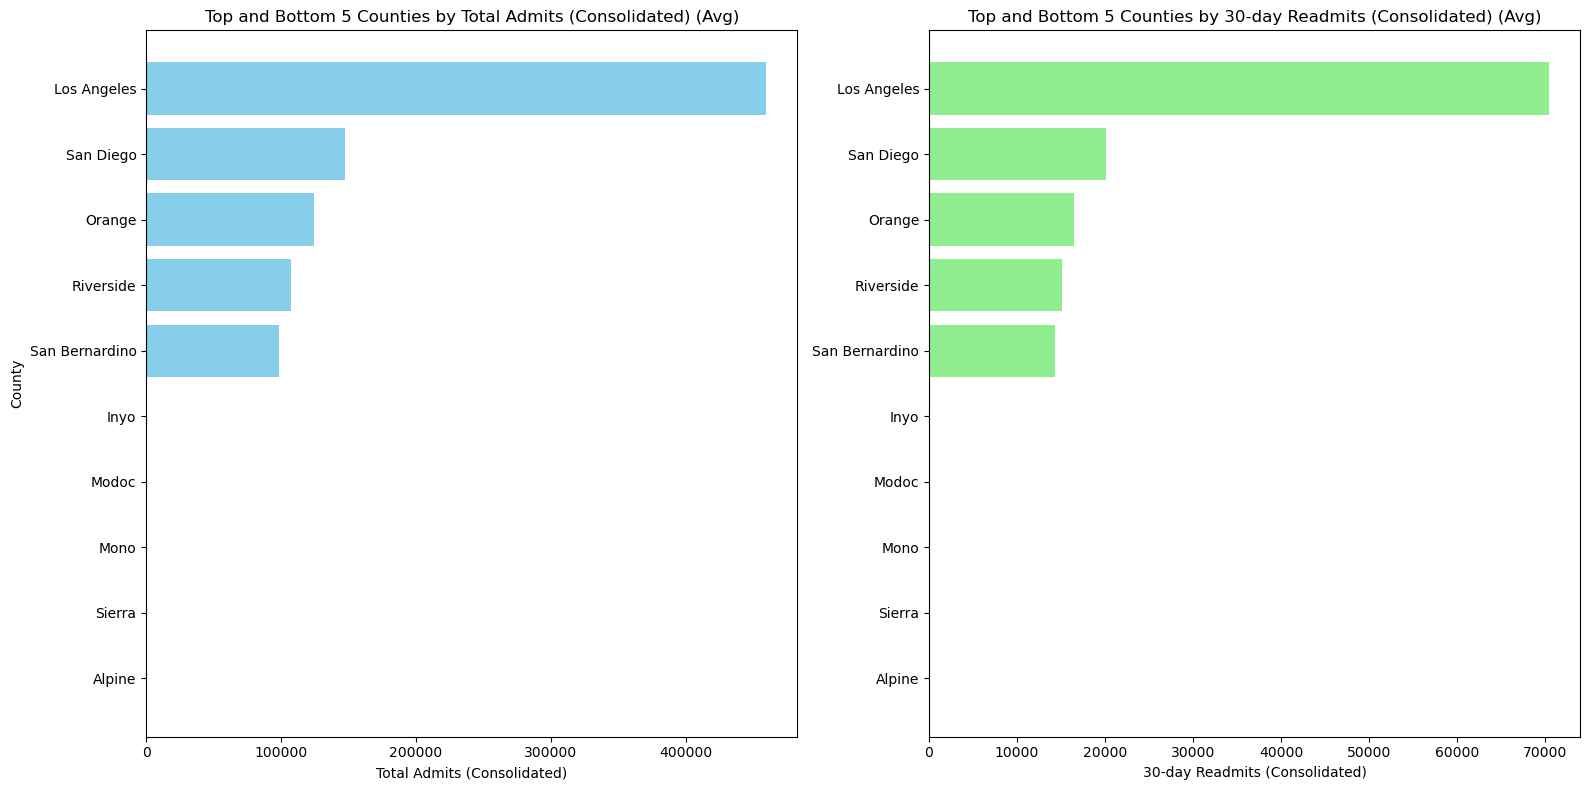

In [22]:
# Group by 'County' and calculate the average values
df_grouped = df.groupby('County').mean(numeric_only=True).reset_index()

# Isolate top 5 and bottom 5 counties by 'Total Admits (Consolidated)'
top_5_admits = df_grouped.nlargest(5, 'Total Admits (Consolidated)').sort_values(by='Total Admits (Consolidated)')
bottom_5_admits = df_grouped.nsmallest(5, 'Total Admits (Consolidated)').sort_values(by='Total Admits (Consolidated)')

# Isolate top 5 and bottom 5 counties by '30-day Readmits (Consolidated)'
top_5_readmits = df_grouped.nlargest(5, '30-day Readmits (Consolidated)').sort_values(by='30-day Readmits (Consolidated)')
bottom_5_readmits = df_grouped.nsmallest(5, '30-day Readmits (Consolidated)').sort_values(by='30-day Readmits (Consolidated)')

# Combine data for visualization
admits_combined = pd.concat([bottom_5_admits, top_5_admits])
readmits_combined = pd.concat([bottom_5_readmits, top_5_readmits])

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot for 'Total Admits (Consolidated)'
axes[0].barh(admits_combined['County'], admits_combined['Total Admits (Consolidated)'], color='skyblue')
axes[0].set_xlabel('Total Admits (Consolidated)')
axes[0].set_ylabel('County')
axes[0].set_title('Top and Bottom 5 Counties by Total Admits (Consolidated) (Avg)')

# Bar plot for '30-day Readmits (Consolidated)'
axes[1].barh(readmits_combined['County'], readmits_combined['30-day Readmits (Consolidated)'], color='lightgreen')
axes[1].set_xlabel('30-day Readmits (Consolidated)')
axes[1].set_title('Top and Bottom 5 Counties by 30-day Readmits (Consolidated) (Avg)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


It appears that these two groups contain all of the same counties. The top counties in both groups are some of the most populous in California and the bottom counties are all some of the least populous.

This highlights the importance of county population for these variables. This justifies taking a step back to source population data for these counties to promote a more relevant analysis.